SENTIMENT ANALYSIS USING RNN

SHIWANGEE GHOSH 21, MAHIMA PAITHANKAR 24, BE-A

Loading data...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 117s 365ms/step - accuracy: 0.7019 - loss: 0.5582 - val_accuracy: 0.8590 - val_loss: 0.3445
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 142s 364ms/step - accuracy: 0.8616 - loss: 0.3407 - val_accuracy: 0.8434 - val_loss: 0.3756
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 142s 365ms/step - accuracy: 0.8844 - loss: 0.2906 - val_accuracy: 0.8424 - val_loss: 0.3918
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 114s 365ms/step - accuracy: 0.8907 - loss: 0.2687 - val_accuracy: 0.8292 - val_loss: 0.4020
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - accuracy: 0.8540 - loss: 0.3458
Test score: 0.34102877974510193
Test accuracy: 0.8560799956321716


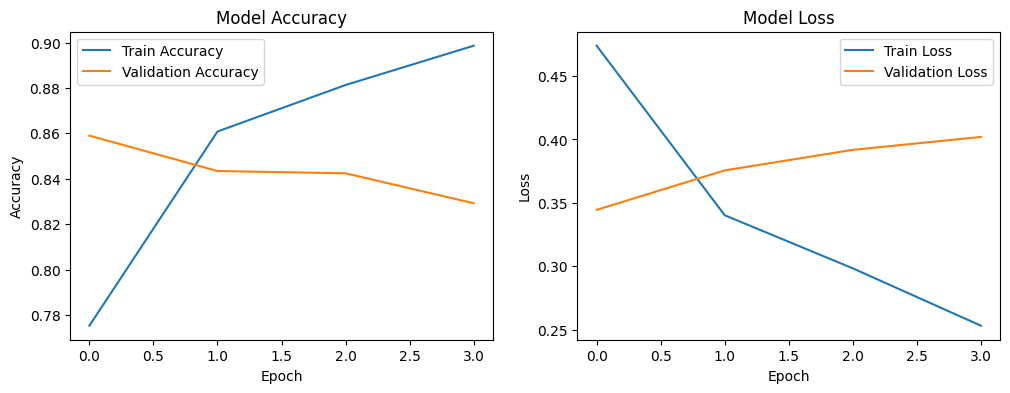

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# -------------------------
# 1. Load Dataset
# -------------------------
max_features = 10000  # number of words to keep
maxlen = 200          # cut reviews after 200 words

print("Loading data...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), "train sequences")
print(len(x_test), "test sequences")

print("Pad sequences (samples x time)")
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# -------------------------
# 2. Build Model
# -------------------------
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

# -------------------------
# 3. Train Model (More Epochs)
# -------------------------
callbacks = [EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]

history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=20,           # Increased from ~5 to 20
                    validation_split=0.2,
                    callbacks=callbacks)

# -------------------------
# 4. Evaluate
# -------------------------
score, acc = model.evaluate(x_test, y_test, batch_size=64)
print('Test score:', score)
print('Test accuracy:', acc)

# -------------------------
# 5. Plot Accuracy & Loss
# -------------------------
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
# -------------------------
# 6. Decode Example Review & Prediction
# -------------------------
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}


def decode_review(text_ids):
    return " ".join([reverse_word_index.get(i - 3, "?") for i in text_ids])


# Take one example from test set
sample_index = 0
sample_review = x_test[sample_index]
original_review = decode_review(x_test[sample_index])


prediction = model.predict(np.expand_dims(sample_review, axis=0))[0][0]


print("\nExample Review:")
print(original_review)
print("\nActual Label:", "Positive" if y_test[sample_index] == 1 else "Negative")
print("Predicted Sentiment:", "Positive" if prediction > 0.5 else "Negative", "(Confidence:", prediction, ")")



1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step

Example Review:
? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss

Actual Label: Negative
Predicted Sentiment: Negative (Confidence: 0.23779894 )
